In [126]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from bioinfokit.visuz import cluster
import sklearn.decomposition
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
df = pd.read_csv("dionice2022.csv", index_col = 0)
df.head()

,AAPL,AXP,CSCO,GE,GS,IBM,INTC,JPM,MMM,MSFT,TRV,VZ
Date,,,,,,,,,,,,
2021-08-02,143.64,164.93,52.19,77.94,356.46,121.08,49.94,142.49,178.67,279.22,142.62,49.71
2021-08-03,145.46,164.71,52.94,79.84,358.51,123.35,50.30,144.12,181.84,281.47,144.00,49.68
2021-08-04,145.05,163.75,52.41,79.73,356.15,122.23,50.15,142.56,178.68,280.87,143.16,49.36
2021-08-05,145.16,165.28,52.48,79.81,362.22,122.24,50.47,144.36,178.92,283.82,144.18,49.30
2021-08-06,144.47,166.97,52.32,80.97,375.03,123.37,50.49,148.46,179.22,283.77,146.32,49.23


In [128]:
povrati = pd.DataFrame(data=np.zeros(shape=(len(df.index), df.shape[1])), 
                             columns=df.columns.values,
                             index=df.index)
povrati = df.pct_change().dropna()
povrati.head()

,AAPL,AXP,CSCO,GE,GS,IBM,INTC,JPM,MMM,MSFT,TRV,VZ
Date,,,,,,,,,,,,
2021-08-03,0.012671,-0.001334,0.014371,0.024378,0.005751,0.018748,0.007209,0.011439,0.017742,0.008058,0.009676,-0.000604
2021-08-04,-0.002819,-0.005828,-0.010011,-0.001378,-0.006583,-0.009080,-0.002982,-0.010824,-0.017378,-0.002132,-0.005833,-0.006441
2021-08-05,0.000758,0.009344,0.001336,0.001003,0.017043,0.000082,0.006381,0.012626,0.001343,0.010503,0.007125,-0.001216
2021-08-06,-0.004753,0.010225,-0.003049,0.014535,0.035365,0.009244,0.000396,0.028401,0.001677,-0.000176,0.014843,-0.001420
2021-08-09,-0.000346,-0.003354,-0.002102,-0.007657,0.004986,-0.008430,0.002575,-0.001078,-0.003571,-0.003912,0.003622,-0.001828


In [129]:
tickers = povrati.columns.values

In [130]:
povrati_std = StandardScaler().fit_transform(povrati)
povrati_std = pd.DataFrame(povrati_std, columns=df.columns)

In [131]:
pca_out = PCA().fit(povrati_std)

In [132]:
eigenvalues = pca_out.explained_variance_

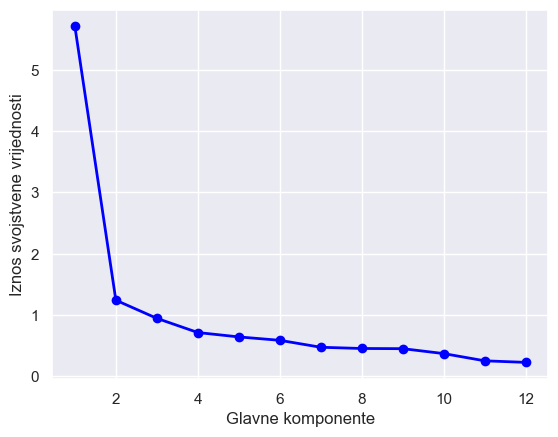

In [133]:
PC_values = np.arange(pca_out.n_components_) + 1
plt.plot(PC_values, eigenvalues, 'o-', linewidth=2, color='blue')
plt.xlabel('Glavne komponente')
plt.ylabel('Iznos svojstvene vrijednosti')
plt.show()

In [134]:
# Udio varijance (from PC1 to PC6)
pca_out.explained_variance_ratio_

array([0.47509983, 0.10297071, 0.07832046, 0.05903992, 0.05308678,
       0.04846771, 0.03902247, 0.03735494, 0.03711966, 0.03042013,
       0.02059965, 0.01849773])

In [135]:
# Kumulativna varijanca (from PC1 to PC6)   
cum=np.cumsum(pca_out.explained_variance_ratio_)

In [136]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
load_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
load_df['variable'] = df.columns.values
load_df = load_df.set_index('variable')
load_df

/opt/homebrew/Caskroom/miniforge/base/envs/diplomski/lib/python3.11/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
variable,,,,,,,,,,,,
AAPL,0.316535,0.416702,0.035946,0.165575,0.042085,0.091853,0.249566,0.031383,0.136976,-0.150676,0.689382,-0.327519
AXP,0.321331,-0.101729,0.247026,0.126246,0.044779,0.376078,0.161524,0.157378,0.089918,0.767674,-0.122553,-0.052079
CSCO,0.293063,0.200743,-0.167444,0.200279,-0.455516,-0.247970,-0.104578,0.258454,-0.665893,0.109981,-0.057482,-0.011569
GE,0.302107,-0.128445,0.181819,-0.353090,0.326343,-0.055946,0.053689,0.718897,-0.031462,-0.305615,-0.102237,0.018291
GS,0.333390,-0.194015,0.250474,0.075217,0.111127,0.159046,-0.248623,-0.372623,-0.203528,-0.275700,-0.286748,-0.587239
IBM,0.265114,-0.134602,-0.357882,-0.275715,-0.618910,0.368747,-0.035932,0.060928,0.377296,-0.178621,-0.088388,-0.037423
INTC,0.278071,0.364081,-0.105666,-0.247640,0.171762,-0.291503,-0.665303,-0.074556,0.293807,0.261244,-0.002020,0.019835
JPM,0.331363,-0.288403,0.204274,0.090191,0.022860,0.222557,-0.268418,-0.204870,-0.168540,-0.147395,0.369472,0.637530
MMM,0.286797,-0.123949,-0.090679,-0.584476,0.035952,-0.318235,0.463389,-0.412313,-0.182232,0.163598,0.065984,0.030417


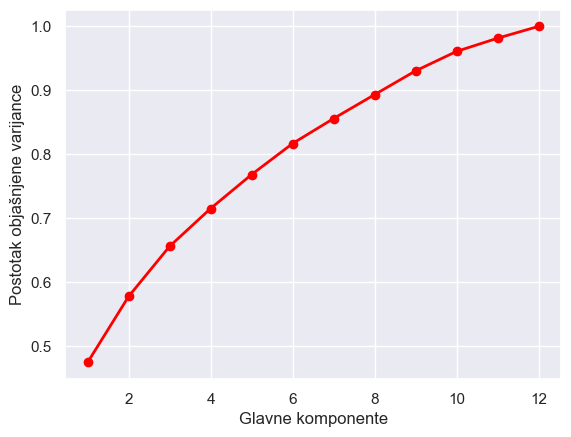

In [137]:
PC_values = np.arange(pca_out.n_components_) + 1
plt.plot(PC_values, cum, 'o-', linewidth=2, color='red')
plt.xlabel('Glavne komponente')
plt.ylabel('Postotak objašnjene varijance')
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/diplomski/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


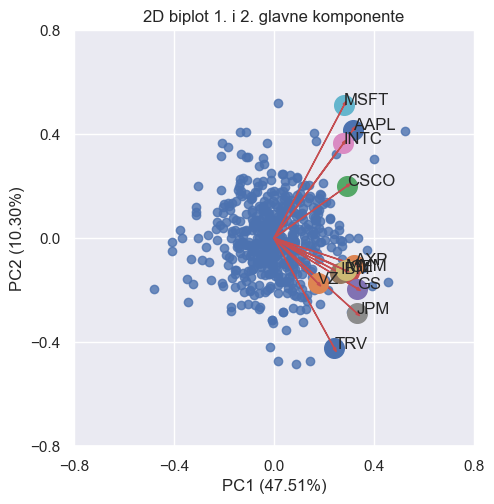

In [138]:
# PC scores
pca_scores = PCA().fit_transform(povrati_std)

#biplot za 1. i 2. gk
pca_df = pd.DataFrame(
    data=pca_scores, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])

pca_df_scaled = pca_df.copy()
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

# 2D
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
xs = loadings[0]
ys = loadings[1]

sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df_scaled, 
    fit_reg=False, 
    )

for i, varnames in enumerate(tickers):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)

 
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1 (%.2f%%)' %(100*pca_out.explained_variance_ratio_[0]))
plt.ylabel('PC2 (%.2f%%)' %(100*pca_out.explained_variance_ratio_[1]))

plt.title('2D biplot 1. i 2. glavne komponente')
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/diplomski/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


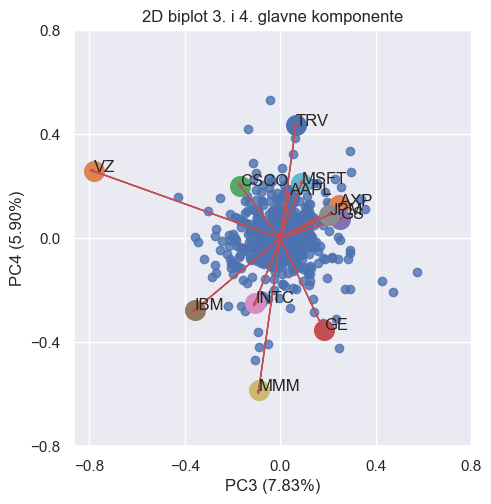

In [139]:
#biplot za 3. i 4. gk
scaler_df = pca_df[['PC3', 'PC4']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

# 2D
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
xs = loadings[2]
ys = loadings[3]

sns.lmplot(
    x='PC3', 
    y='PC4', 
    data=pca_df_scaled, 
    fit_reg=False, 
    )

for i, varnames in enumerate(tickers):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)

 
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC3 (%.2f%%)' %(100*pca_out.explained_variance_ratio_[2]))
plt.ylabel('PC4 (%.2f%%)' %(100*pca_out.explained_variance_ratio_[3]))

plt.title('2D biplot 3. i 4. glavne komponente')
plt.show()

In [140]:
 # normaliziranje za prvu komponentu
pc_w = loadings[0, :] / sum(loadings[0, :])

#jednaki portfelj
pc_w_1n=np.repeat(1/12, 12)#1/n portfelj

<Axes: title={'center': 'Povrati originalnog portfelja i 1. glavnog portfelja'}>

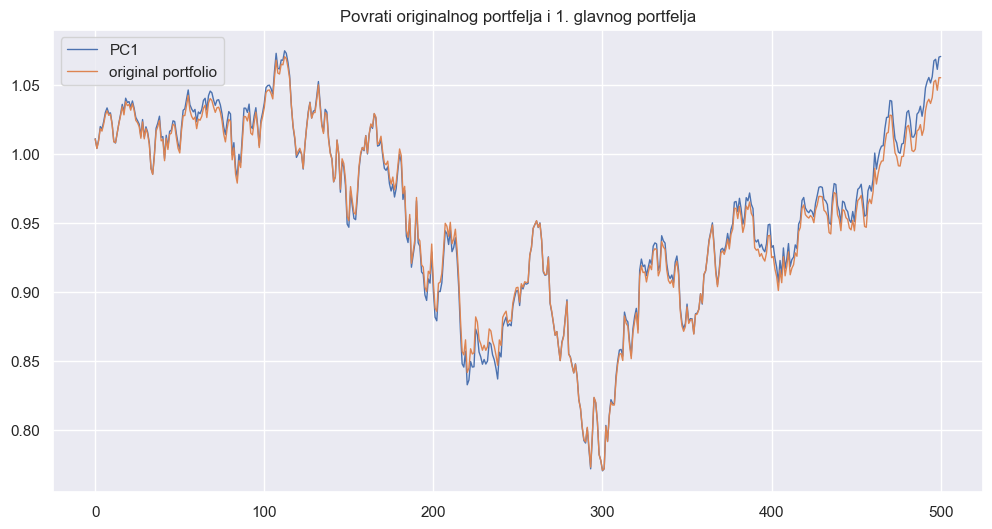

In [141]:
initial_p = pd.DataFrame(data ={'weights': pc_w_1n.squeeze()*100}, index = tickers)
eigen_p1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = tickers)

eigen_p1_povrati = np.dot(povrati.loc[:, eigen_p1.index], eigen_p1 / 100)
eigen_p1_povrati = pd.Series(eigen_p1_povrati.squeeze(), index=povrati_std.index)

initial_povrati = np.dot(povrati.loc[:, initial_p.index], initial_p / 100)
initial_povrati = pd.Series(initial_povrati.squeeze(), index=povrati_std.index)

df_plot = pd.DataFrame({'PC1': eigen_p1_povrati, 'original portfolio': initial_povrati}, index=povrati_std.index)
np.cumprod(df_plot+1).plot(title='Povrati originalnog portfelja i 1. glavnog portfelja', 
                             figsize=(12,6), linewidth=1)
                             

In [142]:
# 2.komponenta ima negativne vrijednosti

#za negativne tezine + risk free rate
l=loadings[1, :] 
rat = sum(l[l < 0])/sum(l[l > 0])*0.0002
print(rat)

#omjeri samo za pozitivne tezine
l[l < 0] = 0 
l[l > 0] = l[l > 0] / sum(l[l > 0]) 
print(sum(l))


-0.00020996958041710135
1.0


<Axes: title={'center': 'Povrati originalnog portfelja i 2. glavnog portfelja'}>

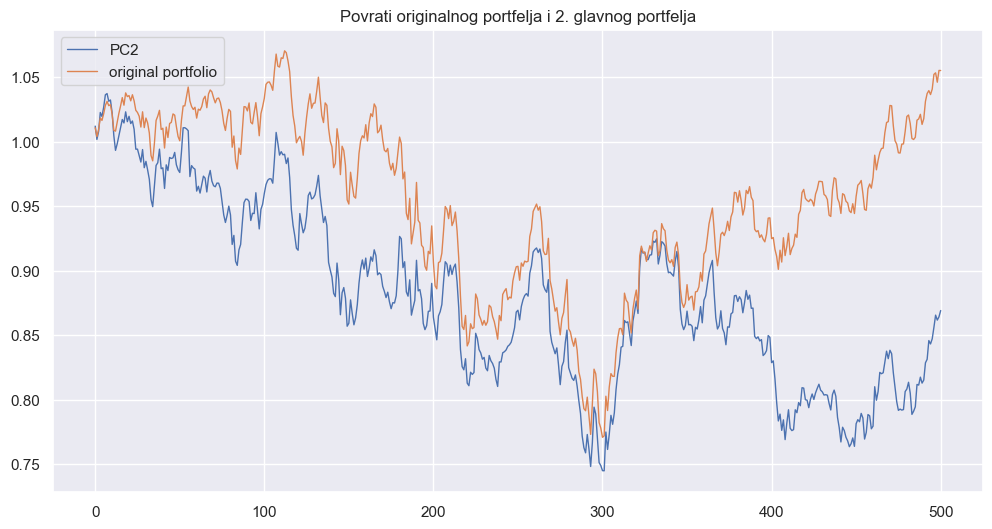

In [143]:
eigen_p2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = tickers)
eigen_p2.sort_values(by=['weights'], ascending=False, inplace=True)

eigen_p2_povrati = np.dot(povrati.loc[:, eigen_p2.index], l)
eigen_p2_povrati = pd.Series(eigen_p2_povrati.squeeze(), index=povrati_std.index)

df_plot = pd.DataFrame({'PC2': eigen_p2_povrati + rat, 'original portfolio': initial_povrati}, index=povrati_std.index)
np.cumprod(df_plot+1).plot(title='Povrati originalnog portfelja i 2. glavnog portfelja', 
                             figsize=(12,6), linewidth=1)

In [144]:
# 3.komponenta ima negativne vrijednosti

#za negativne tezine + risk free rate
l=loadings[2, :] 
rat = sum(l[l < 0])/sum(l[l > 0])*0.0002
print(rat)

#omjeri samo za pozitivne tezine
l[l < 0] = 0 
l[l > 0] = l[l > 0] / sum(l[l > 0]) 
print(sum(l))


-0.00028036062148337323
1.0


<Axes: title={'center': 'Povrati originalnog portfelja i 3. glavnog portfelja'}>

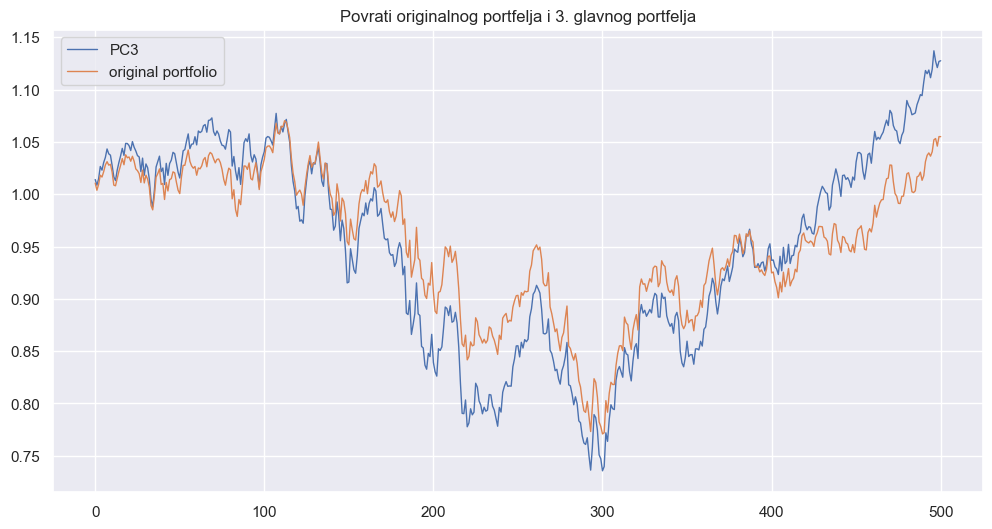

In [145]:
eigen_p3 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = tickers)
eigen_p3.sort_values(by=['weights'], ascending=False, inplace=True)

eigen_p3_povrati = np.dot(povrati.loc[:, eigen_p3.index], l)
eigen_p3_povrati = pd.Series(eigen_p3_povrati.squeeze(), index=povrati_std.index)

df_plot = pd.DataFrame({'PC3': eigen_p3_povrati + rat, 'original portfolio': initial_povrati}, index=povrati_std.index)
np.cumprod(df_plot + 1).plot(title='Povrati originalnog portfelja i 3. glavnog portfelja', 
                             figsize=(12,6), linewidth=1)

In [146]:
#za negativne tezine + risk free rate
l=loadings[3, :] 
rat = sum(l[l < 0])/sum(l[l > 0])*0.0002
print(rat)

#omjeri samo za pozitivne tezine
l[l < 0] = 0 
l[l > 0] = l[l > 0] / sum(l[l > 0]) 
print(sum(l))

-0.0001873175551089219
0.9999999999999999


<Axes: title={'center': 'Povrati originalnog portfelja i 4. glavnog portfelja'}>

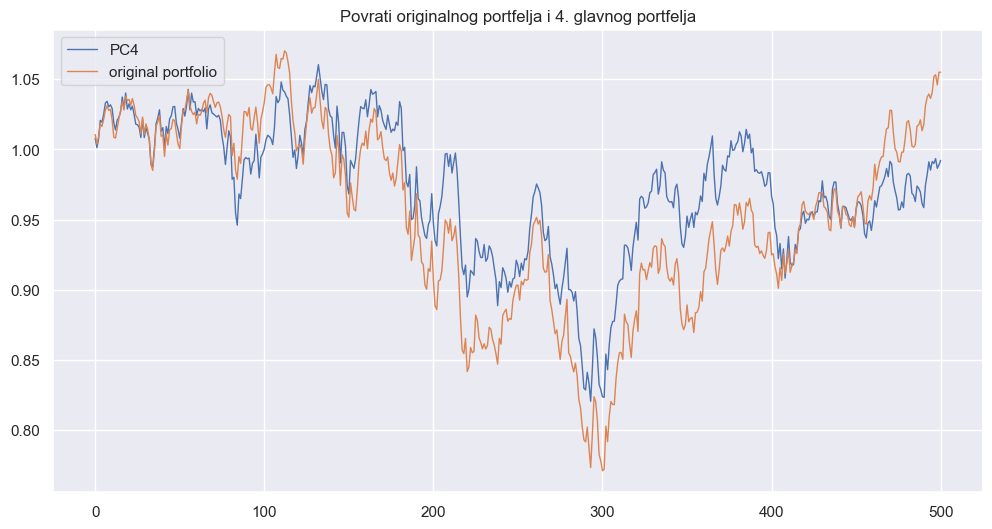

In [147]:
eigen_p4 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = tickers)
eigen_p4.sort_values(by=['weights'], ascending=False, inplace=True)

eigen_p4_povrati = np.dot(povrati.loc[:, eigen_p4.index], l)
eigen_p4_povrati = pd.Series(eigen_p4_povrati.squeeze(), index=povrati_std.index)

df_plot = pd.DataFrame({'PC4': eigen_p4_povrati + rat, 'original portfolio': initial_povrati}, index=povrati_std.index)
np.cumprod(df_plot + 1).plot(title='Povrati originalnog portfelja i 4. glavnog portfelja', 
                             figsize=(12,6), linewidth=1)

In [148]:
#za negativne tezine + risk free rate
l=loadings[4, :] 
rat = sum(l[l < 0])/sum(l[l > 0])*0.0002
print(rat)

#omjeri samo za pozitivne tezine
l[l < 0] = 0 
l[l > 0] = l[l > 0] / sum(l[l > 0]) 
print(sum(l))

-0.00018704293294794026
1.0


In [149]:
def sharpe_ratio(ts_povrati, periods_per_year=252):
    
    annualized_return = 0.
    annualized_vol = 0.
    annualized_sharpe = 0.
    
    n_years = ts_povrati.shape[0] / periods_per_year
    annualized_return = np.power(np.prod(1 + ts_povrati),(1 / n_years)) - 1
    annualized_vol = ts_povrati.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol
   
    
    return annualized_return, annualized_vol, annualized_sharpe

In [150]:
ret, vol, sharpe = sharpe_ratio(eigen_p1_povrati)
print('First eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (ret*100, vol*100, sharpe))

ret, vol, sharpe = sharpe_ratio(eigen_p2_povrati)
print('Second eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (ret*100, vol*100, sharpe))

ret, vol, sharpe = sharpe_ratio(eigen_p3_povrati)
print('Third eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (ret*100, vol*100, sharpe))

ret, vol, sharpe = sharpe_ratio(eigen_p4_povrati)
print('Fourth eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (ret*100, vol*100, sharpe))

ret, vol, sharpe = sharpe_ratio(initial_povrati)
print('Original portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (ret*100, vol*100, sharpe))

First eigen-portfolio:
Return = 3.48%
Volatility = 19.64%
Sharpe = 0.18
Second eigen-portfolio:
Return = -1.75%
Volatility = 20.03%
Sharpe = -0.09
Third eigen-portfolio:
Return = 14.00%
Volatility = 21.28%
Sharpe = 0.66
Fourth eigen-portfolio:
Return = 4.42%
Volatility = 17.58%
Sharpe = 0.25
Original portfolio:
Return = 2.73%
Volatility = 19.05%
Sharpe = 0.14
